In [2]:
%matplotlib nbagg
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('yearInter.csv')

In [4]:
df

,Unnamed: 0,구분,죄종,발생검거,건수,date
0,0,중부,살인,발생,1.0,2000-01-01
1,1,중부,살인,검거,1.0,2000-01-01
2,2,중부,강도,발생,17.0,2000-01-01
3,3,중부,강도,검거,15.0,2000-01-01
4,4,중부,강간,발생,14.0,2000-01-01
...,...,...,...,...,...,...
5885,5885,수서,강간,검거,171.0,2018-01-01
5886,5886,수서,절도,발생,984.0,2018-01-01
5887,5887,수서,절도,검거,481.0,2018-01-01
5888,5888,수서,폭력,발생,1697.0,2018-01-01


In [5]:
del df['Unnamed: 0']
df

,구분,죄종,발생검거,건수,date
0,중부,살인,발생,1.0,2000-01-01
1,중부,살인,검거,1.0,2000-01-01
2,중부,강도,발생,17.0,2000-01-01
3,중부,강도,검거,15.0,2000-01-01
4,중부,강간,발생,14.0,2000-01-01
...,...,...,...,...,...
5885,수서,강간,검거,171.0,2018-01-01
5886,수서,절도,발생,984.0,2018-01-01
5887,수서,절도,검거,481.0,2018-01-01
5888,수서,폭력,발생,1697.0,2018-01-01


In [6]:
occur_arrest = df.pivot_table(values='건수', index='date', columns='발생검거', aggfunc=sum)

In [7]:
occur_arrest.columns.values[0] = 'Arrest'
occur_arrest.columns.values[1] = 'Occur'
occur_arrest.head()

발생검거,Arrest,Occur
date,,
2000-01-01,105638.0,136077.0
2001-01-01,117717.0,155480.0
2002-01-01,126647.0,147702.0
2003-01-01,122782.0,144732.0
2004-01-01,99129.0,121415.0


In [8]:
occur_arrest.to_csv('occur_arrest.csv')
oa = pd.read_csv('occur_arrest.csv')

In [9]:
pd.to_numeric(oa['Arrest'])
pd.to_numeric(oa['Occur'])
oa['Non-Arrest'] = oa['Occur'] - oa['Arrest']
oa.head()

,date,Arrest,Occur,Non-Arrest
0,2000-01-01,105638.0,136077.0,30439.0
1,2001-01-01,117717.0,155480.0,37763.0
2,2002-01-01,126647.0,147702.0,21055.0
3,2003-01-01,122782.0,144732.0,21950.0
4,2004-01-01,99129.0,121415.0,22286.0


<IPython.core.display.Javascript object>


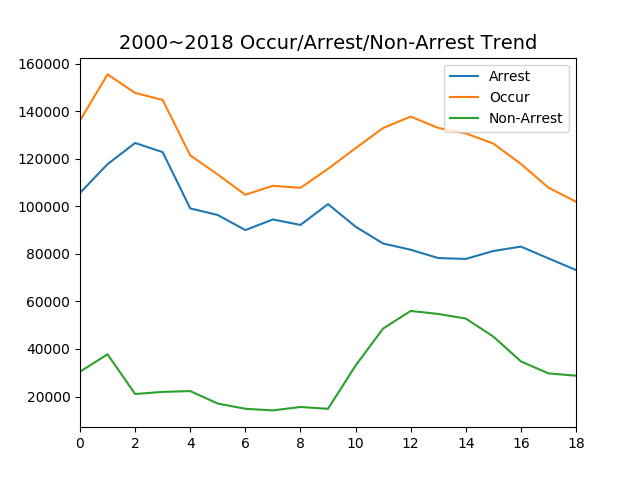

Text(0.5, 1.0, '2000~2018 Occur/Arrest/Non-Arrest Trend')

In [10]:
ax = oa.plot()
ax.set_title("2000~2018 Occur/Arrest/Non-Arrest Trend", fontsize=14)

In [19]:
area_occurarrest = df['건수'].groupby([df['발생검거'], df['구분']]).sum()

In [22]:
aou = area_occurarrest.unstack()
aou

구분,강남,강동,강북,강서,관악,광진,구로,금천,남대문,노원,...,수서,양천,영등포,용산,은평,종로,종암,중랑,중부,혜화
발생검거,,,,,,,,,,,,,,,,,,,,,
검거,76302.0,73508.0,63990.0,80481.0,73510.0,77936.0,71310.0,66294.0,28389.0,63699.0,...,50073.0,59550.0,79128.0,52274.0,41487.0,34546.0,38660.0,80392.0,38408.0,41222.0
발생,108201.0,91994.0,76954.0,108279.0,109966.0,108983.0,100166.0,86659.0,36654.0,81668.0,...,71408.0,82014.0,108928.0,67209.0,54194.0,43920.0,46916.0,100002.0,51459.0,51025.0
